In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,accuracy_score,roc_auc_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import load_digits

(1797, 64)
[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]
4


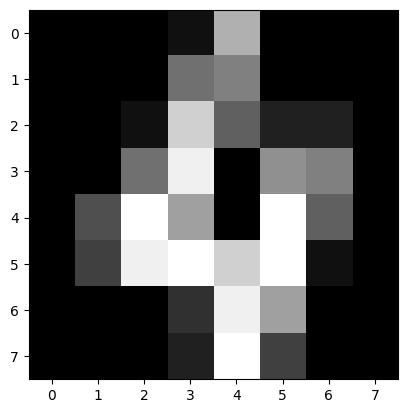

In [9]:
digits = load_digits()
data = digits.data
label = digits.target
print(data.shape)
print(digits.images[4])
print(digits.target[4])
# 显示图像
plt.gray()
plt.imshow(digits.images[4])
plt.show()

In [16]:
train_x,test_x,train_y,test_y = train_test_split(data,label,test_size=0.25,random_state=1)
# 归一化处理
ss = StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.fit_transform(test_x)
knn = KNeighborsClassifier()
knn = knn.fit(train_ss_x,train_y)
predict_val = knn.predict(test_ss_x)
score = accuracy_score(test_y,predict_val)
print(f"KNN分类准确率为:{score}")

KNN分类准确率为:0.98


In [19]:
# SVM
svm = SVC()
svm.fit(train_ss_x,train_y)
predict_val = svm.predict(test_ss_x)
score = accuracy_score(test_y,predict_val)
print(f"SVM分类准确率为:{score}")

SVM分类准确率为:0.9844444444444445


In [26]:
# 决策树
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(train_ss_x,train_y)
predict_val = clf.predict(test_ss_x)
score = accuracy_score(test_y,predict_val)
print(f"CART树分类准确率:{score}")

CART树分类准确率:0.7555555555555555


In [25]:
# 朴素贝叶斯
# 朴素贝叶斯不能处理负数，所以需要,min-max归一化
mm = MinMaxScaler()
train_mm_x = mm.fit_transform(train_x)
test_mm_x = mm.fit_transform(test_x)
bayes = MultinomialNB()
bayes.fit(train_mm_x,train_y)
predict_val = bayes.predict(test_mm_x)
score = accuracy_score(test_y,predict_val)
print(f"朴素贝叶斯分类准确率:{score}")

朴素贝叶斯分类准确率:0.9


In [27]:
# 随机森林
rf = RandomForestClassifier(criterion='gini')
rf.fit(train_ss_x,train_y)
predict_val = rf.predict(test_ss_x)
score = accuracy_score(test_y,predict_val)
print(f"随机森林分类准确率:{score}")

随机森林分类准确率:0.9777777777777777
